In [153]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, load_digits
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

# Clustering

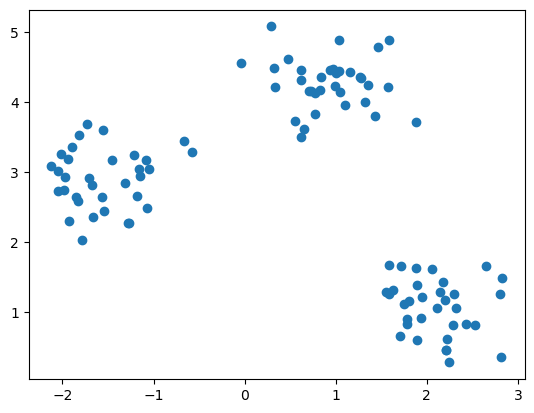

In [154]:
x, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(x[:,0], x[:,1])

In [155]:
model = KMeans(n_clusters=3)
model.fit(x)


,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [156]:
model.labels_

array([1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 0,
       0, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2], dtype=int32)

In [157]:
model.predict(x)

array([1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 0,
       0, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2], dtype=int32)

array([[ 0.92702654,  4.27385438],
       [ 2.08889087,  1.07930405],
       [-1.55022199,  2.90542155]])

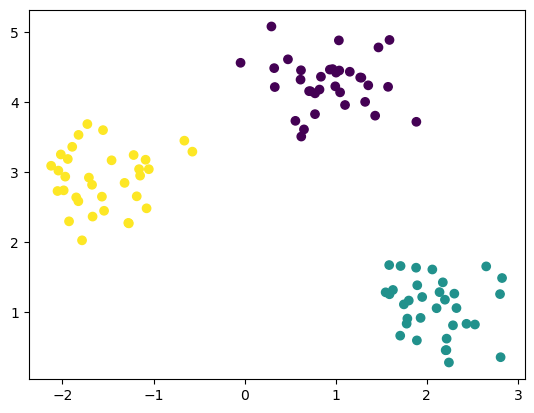

In [158]:
plt.scatter(x[:,0], x[:,1], c=model.predict(x))
model.cluster_centers_

30.87053128014067

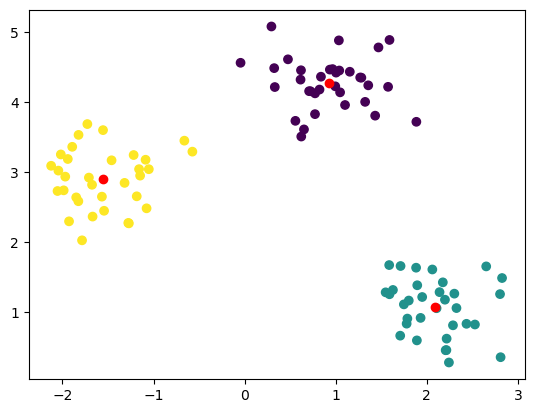

In [159]:
plt.scatter(x[:,0], x[:,1], c=model.predict(x))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='red')
model.inertia_

-30.87053128014068

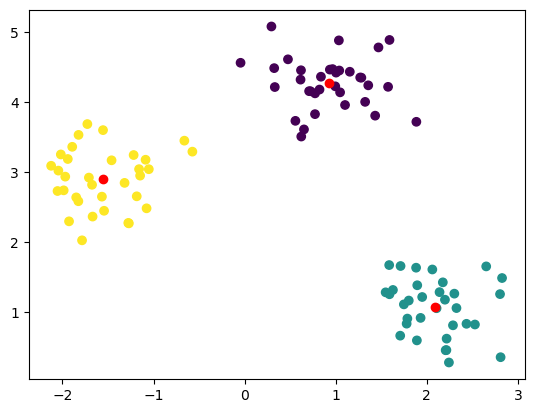

In [160]:
plt.scatter(x[:,0], x[:,1], c=model.predict(x))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='red')
model.score(x)

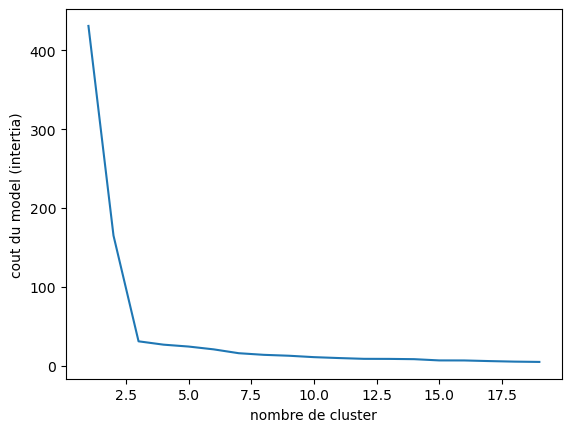

In [161]:
intia = []
k_reange = range(1,20)
for k in k_reange:
    model = KMeans(n_clusters=k)
    model.fit(x)
    intia.append(model.inertia_)
    
plt.plot(k_reange, intia)
plt.xlabel("nombre de cluster")
plt.ylabel("cout du model (intertia)")
plt.show()

#ici le coude est égale à 3

# Detection d'anomalie

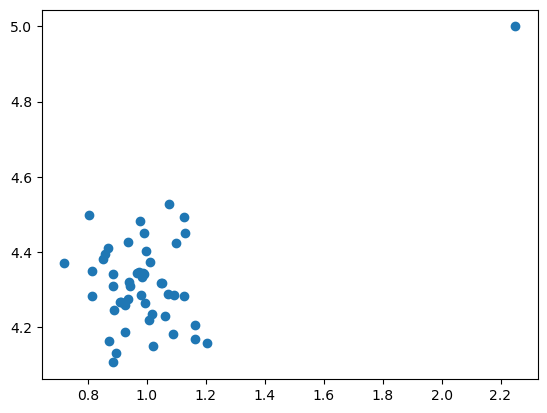

In [162]:
x, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
x[-1,:] = np.array([2.25, 5])

plt.scatter(x[:,0], x[:, 1])

In [163]:
model = IsolationForest(contamination=0.01)
model.fit(x)

,n_estimators,100
,max_samples,'auto'
,contamination,0.01
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,None
,verbose,0
,warm_start,False


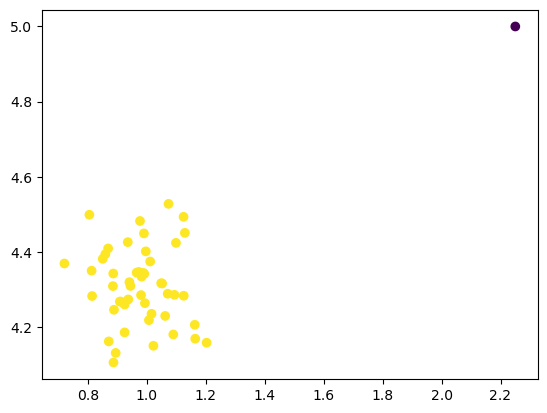

In [164]:
plt.scatter(x[:,0], x[:, 1], c=model.predict(x))

## Application sur le dataset digits

In [165]:
digits = load_digits()
image = digits.images
x = digits.data
y = digits.target


In [166]:
x.shape

(1797, 64)

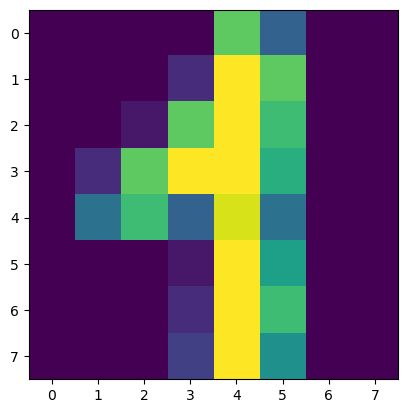

In [167]:
plt.imshow(image[42])

In [168]:
model = IsolationForest(random_state=0, contamination=0.02)
model.fit(x)

,n_estimators,100
,max_samples,'auto'
,contamination,0.02
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,0
,verbose,0
,warm_start,False


In [169]:
model.predict(x)

array([1, 1, 1, ..., 1, 1, 1], shape=(1797,))

In [170]:
outlier = model.predict(x) == -1

In [171]:
outlier

array([False, False, False, ..., False, False, False], shape=(1797,))

In [172]:
image[outlier]

array([[[ 0.,  0.,  0., ..., 15.,  4.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.],
        ...,
        [ 0.,  9., 16., ...,  1.,  0.,  0.],
        [ 0.,  3.,  8., ...,  9.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.]],

       [[ 0.,  6., 16., ..., 15., 10.,  0.],
        [ 0.,  9., 16., ...,  6.,  5.,  0.],
        [ 0., 12., 16., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  3., ...,  0.,  0.,  0.],
        [ 0.,  1.,  5., ...,  0.,  0.,  0.],
        [ 0.,  9., 16., ...,  0.,  0.,  0.]],

       [[ 0.,  4., 16., ..., 16.,  5.,  0.],
        [ 0., 11., 16., ...,  8.,  3.,  0.],
        [ 0., 10., 16., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0., 12., ...,  0.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.],
        [ 0.,  4., 16., ...,  0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.

In [173]:
image[outlier][0]

array([[ 0.,  0.,  0.,  0., 11., 15.,  4.,  0.],
       [ 0.,  0.,  0.,  3., 16., 16., 12.,  0.],
       [ 0.,  0.,  0.,  8., 14., 16., 12.,  0.],
       [ 0.,  0.,  0.,  5., 10., 16.,  6.,  0.],
       [ 0.,  1.,  7., 11., 16., 13.,  0.,  0.],
       [ 0.,  9., 16., 16., 14.,  1.,  0.,  0.],
       [ 0.,  3.,  8., 14., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 11., 16., 12.,  0.]])

Text(0.5, 1.0, '2')

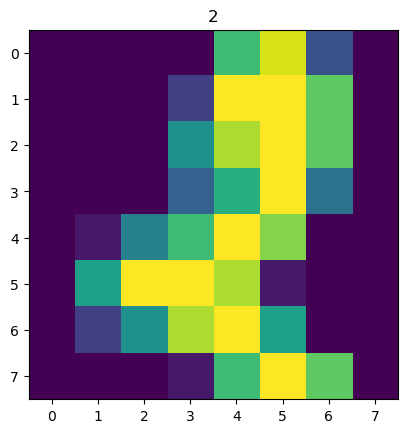

In [174]:
plt.imshow(image[outlier][0])
plt.title(y[outlier][0])

# Reduction de la dimentionalité

## visualisation de donnée

In [175]:
x.shape

(1797, 64)

In [176]:
model = PCA(n_components=2)
model.fit_transform(x).shape

(1797, 2)

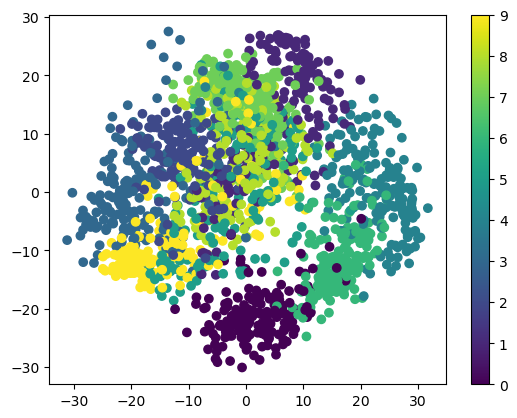

In [177]:
x_reduced = model.fit_transform(x)
plt.scatter(x_reduced[:,0], x_reduced[:, 1], c=y)
plt.colorbar()


In [178]:
model.components_ # le contenue de chaque composante

array([[ 0.00000000e+00, -1.73094651e-02, -2.23428835e-01,
        -1.35913304e-01, -3.30323092e-02, -9.66340844e-02,
        -8.32943805e-03,  2.26900082e-03, -3.20516495e-04,
        -1.19308905e-01, -2.44451676e-01,  1.48512745e-01,
        -4.67319410e-02, -2.17740744e-01, -1.48136776e-02,
         4.47779518e-03, -4.94136398e-05, -7.95419375e-02,
         8.33951454e-02,  2.15915342e-01, -1.72126801e-01,
        -1.63712098e-01,  2.86444452e-02,  4.23251803e-03,
         9.85488574e-05,  6.42319144e-02,  2.54093316e-01,
        -3.56771026e-02, -2.09462569e-01, -4.31311420e-02,
         5.13118688e-02,  2.13422732e-04,  0.00000000e+00,
         1.59950883e-01,  3.68690774e-01,  1.64406827e-01,
         8.52007908e-02,  3.72982855e-02,  2.15866980e-02,
         0.00000000e+00,  1.28865585e-03,  1.06945287e-01,
         3.03067457e-01,  2.47813041e-01,  2.09637296e-01,
         1.22325219e-02, -3.69458497e-02,  1.61485028e-03,
         6.93023548e-04, -8.35144239e-03, -5.58598986e-0

In [179]:
model.components_.shape

(2, 64)

## Compresser un datasets

In [180]:
x.shape

(1797, 64)

In [181]:
model = PCA(n_components=64)
x_reduced = model.fit_transform(x)

In [182]:
model.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

In [183]:
np.cumsum(model.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

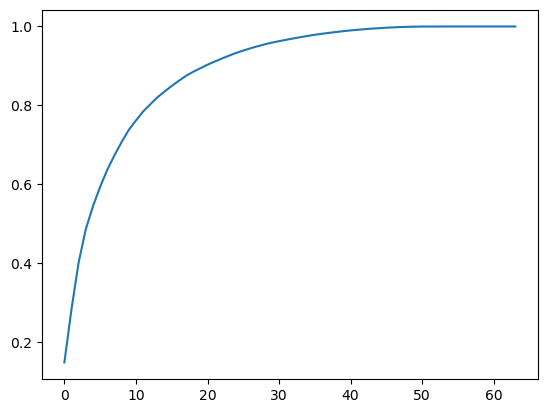

In [184]:
plt.plot(np.cumsum(model.explained_variance_ratio_))

In [185]:
np.argmax(np.cumsum(model.explained_variance_ratio_) > 0.99)# le meillieur parametre a mettre pour n_component à la ligne model = PCA(n_components=valeur) est 40

np.int64(40)

In [186]:
model = PCA(n_components=40)
x_reduced = model.fit_transform(x)

## Decompresser

In [187]:
x_recovered = model.inverse_transform(x_reduced)

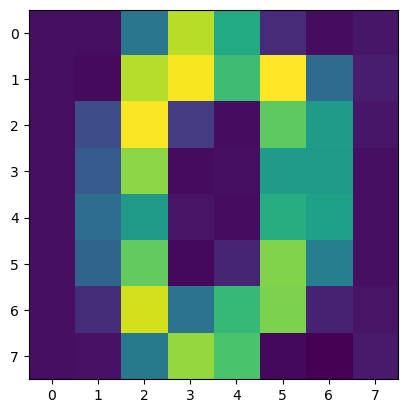

In [188]:
plt.imshow(x_recovered[0].reshape(8,8))

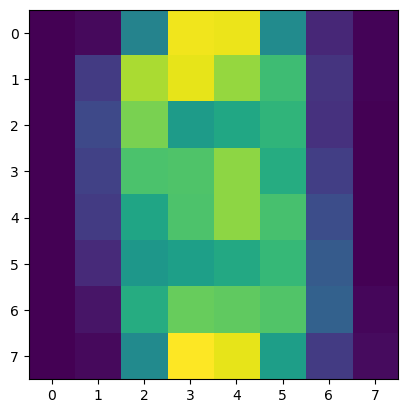

In [189]:
model = PCA(n_components=1)
x_reduced = model.fit_transform(x)
x_recovered = model.inverse_transform(x_reduced)
plt.imshow(x_recovered[0].reshape(8,8))

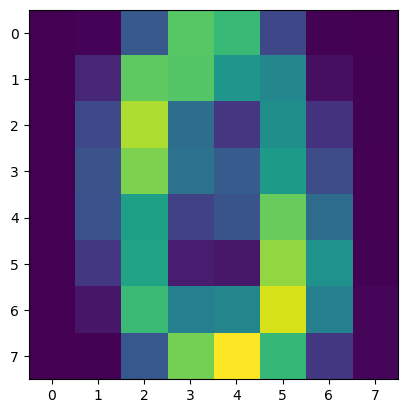

In [190]:
model = PCA(n_components=2)
x_reduced = model.fit_transform(x)
x_recovered = model.inverse_transform(x_reduced)
plt.imshow(x_recovered[0].reshape(8,8))

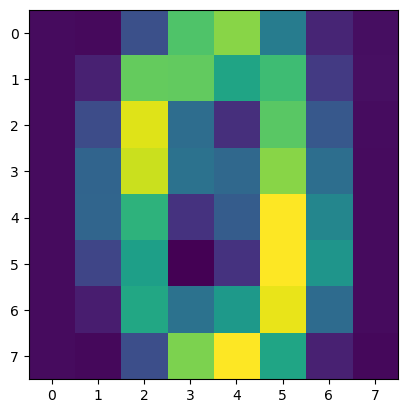

In [191]:
model = PCA(n_components=3)
x_reduced = model.fit_transform(x)
x_recovered = model.inverse_transform(x_reduced)
plt.imshow(x_recovered[0].reshape(8,8))

## methode plus rapide

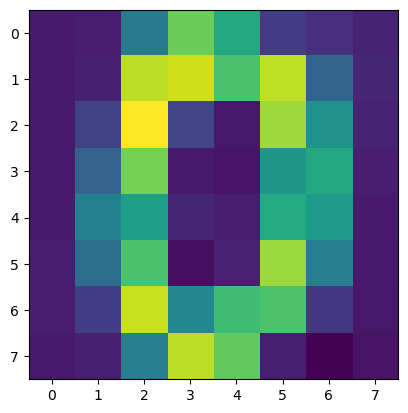

In [192]:
model = PCA(n_components= 0.95)
x_reduced = model.fit_transform(x)
x_recovered = model.inverse_transform(x_reduced)
plt.imshow(x_recovered[0].reshape(8,8))

In [193]:
model.n_components

0.95